In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

https://www.kaggle.com/c/titanic

In [2]:
ttest=pd.read_csv("titanic_test.csv")
ttrain=pd.read_csv("titanic_train.csv")

In [3]:
ttrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
ttrain.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ttrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
ttrain.shape

(891, 12)

In [7]:
ttrainnum=ttrain.select_dtypes(include=[np.number])
ttraincat=ttrain.select_dtypes(include=['object'])

In [8]:
(ttraincat.isnull().sum().sort_values(ascending=False))

Cabin       687
Embarked      2
Name          0
Sex           0
Ticket        0
dtype: int64

In [9]:
(ttrainnum.isnull().sum().sort_values(ascending=False))

Age            177
PassengerId      0
Survived         0
Pclass           0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [10]:
nonecols=["Cabin","Embarked"]

In [11]:
for col in nonecols:
    ttraincat[col].fillna('No Value',inplace=True)

In [12]:
(ttraincat.isnull().sum().sort_values(ascending=False))

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

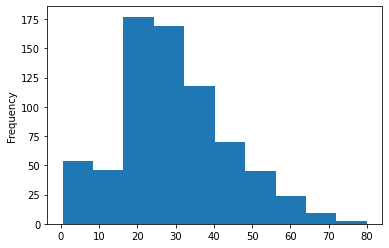

In [13]:
ttrainnum['Age'].plot(kind='hist')

In [14]:
ttrainnum.Age.fillna(ttrainnum.Age.value_counts().median(),inplace=True)

In [15]:
(ttrainnum.isnull().sum().sort_values(ascending=False))

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
ttraincat1=ttraincat.apply(le.fit_transform)


In [19]:
from sklearn import preprocessing

In [20]:
mm_scaler = preprocessing.MinMaxScaler()

In [21]:
ttrainnum1 =mm_scaler.fit_transform(ttrainnum)

In [23]:
ttrainnum.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
ttraindf=pd.concat([pd.DataFrame(ttrainnum1),ttraincat1],axis=1)

In [25]:
ttraindf.head()


,0,1,2,3,4,5,6,Name,Sex,Ticket,Cabin,Embarked
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,108,1,523,146,3
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,190,0,596,81,0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,353,0,669,146,3
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,272,0,49,55,3
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,15,1,472,146,3


In [26]:
ttraindf.rename(columns={0:"PassengerId",1:"Survived",2:"Pclass",3:"Age",4:"SibSp",5:"Parch",6:"Fare"},inplace=True)

In [27]:
ttraindf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,108,1,523,146,3
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,190,0,596,81,0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,353,0,669,146,3
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,272,0,49,55,3
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,15,1,472,146,3


In [28]:
X_train=ttraindf.drop(['Survived','PassengerId'],axis=1)

In [29]:
y_train=ttraindf.Survived

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
Logreg=LogisticRegression()

In [32]:
LogRegmodel=Logreg.fit(X_train,y_train)

C:\Users\Lalith Eswar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
LogRegmodel.score(X_train,y_train)

0.7789001122334456

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=100)

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
rf.score(X_train,y_train)

1.0

In [38]:
ttestnum=ttest.select_dtypes(include=[np.number])
ttestcat=ttest.select_dtypes(include=['object'])

In [39]:
(ttestcat.isnull().sum().sort_values(ascending=False))

Cabin       327
Name          0
Sex           0
Ticket        0
Embarked      0
dtype: int64

In [40]:
(ttestnum.isnull().sum().sort_values(ascending=False))

Age            86
Fare            1
PassengerId     0
Pclass          0
SibSp           0
Parch           0
dtype: int64

In [41]:
ttestnum.Age.fillna(ttestnum.Age.value_counts().median(),inplace=True)

In [42]:
ttestnum.Fare.fillna(ttestnum.Fare.value_counts().median(),inplace=True)

In [43]:
for col in nonecols:
    ttestcat[col].fillna('No Value',inplace=True)

In [44]:
(ttestcat.isnull().sum().sort_values(ascending=False))

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [45]:
(ttestnum.isnull().sum().sort_values(ascending=False))

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [46]:
ttestcat1=ttestcat.apply(le.fit_transform)

ttestnum1 =mm_scaler.fit_transform(ttestnum)

In [47]:
ttestnum.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [48]:
ttestdf=pd.concat([pd.DataFrame(ttestnum1),ttestcat1],axis=1)

In [49]:
ttestdf.columns

Index([0, 1, 2, 3, 4, 5, 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [50]:
ttestdf.rename(columns={0:"PassengerId",1:"Pclass",2:"Age",3:"SibSp",4:"Parch",5:"Fare"},inplace=True)

In [51]:
X_test=ttestdf.drop(['PassengerId'],axis=1)

In [52]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.452723,0.000,0.000000,0.015282,206,1,152,76,1
1,1.0,0.617566,0.125,0.000000,0.013663,403,0,221,76,2
2,0.5,0.815377,0.000,0.000000,0.018909,269,1,73,76,1
3,1.0,0.353818,0.000,0.000000,0.016908,408,1,147,76,2
4,1.0,0.287881,0.125,0.111111,0.023984,178,0,138,76,2


In [53]:
X_test.shape

(418, 10)

In [54]:
y_predict_logreg=LogRegmodel.predict(X_test)

In [55]:
y_logreg=pd.DataFrame(y_predict_logreg)

In [56]:
y_logreg.to_csv('titanic_logreg_20J.csv')

In [57]:
y_predict_rf=rf.predict(X_test)

In [58]:
y_rf=pd.DataFrame(y_predict_rf)

In [59]:
y_rf.to_csv('titanic_rf.csv')

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
GBC=GradientBoostingClassifier(n_estimators=10000)

In [62]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10000)

In [63]:
GBC.score(X_train,y_train)

1.0

In [64]:
y_predict_gbc=GBC.predict(X_test)

In [65]:
y_gbc=pd.DataFrame(y_predict_gbc)

In [66]:
y_gbc.to_csv('titanic_gbc_20J.csv')

In [67]:
from sklearn import svm

In [68]:
model = svm.SVC()

In [69]:
model.fit(X_train,y_train)

SVC()

In [70]:
model.score(X_train,y_train)

0.6610549943883277

In [71]:
y_predict_svc=model.predict(X_test)

In [72]:
y_svc=pd.DataFrame(y_predict_svc)

In [73]:
y_svc.to_csv('titanic_svc_20J_linear.csv')